In [1]:
from google.colab import drive
# drive.mount('/content/drive/', force_remount=True)
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pwd

/content


In [3]:
cd "drive/MyDrive/Doutorado/Disciplinas/[2022.1] [PUC-Rio] Introdução à Ciência de Dados - Professor: Hélio Côrtes Vieira Lopes/Trabalho/"

/content/drive/MyDrive/Doutorado/Disciplinas/[2022.1] [PUC-Rio] Introdução à Ciência de Dados - Professor: Hélio Côrtes Vieira Lopes/Trabalho


In [4]:
!pwd

/content/drive/MyDrive/Doutorado/Disciplinas/[2022.1] [PUC-Rio] Introdução à Ciência de Dados - Professor: Hélio Côrtes Vieira Lopes/Trabalho


# Install SentenceTransformers


Based on:

**BERT For Measuring Text Similarity**

https://towardsdatascience.com/bert-for-measuring-text-similarity-eec91c6bf9e1

*mean pooling operation*

"Each of those 512 tokens has a respective 768 values. This pooling operation will take the mean of all token embeddings and compress them into a single 768 vector space — creating a ‘sentence vector’."


**SentenceTransformers Documentation**

https://www.sbert.net/

In [5]:
! pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.4 MB/s 
     |████████████████████████████████| 4.4 MB 16.1 MB/s 
     |████████████████████████████████| 1.2 MB 47.7 MB/s 
     |████████████████████████████████| 101 kB 12.3 MB/s 
     |████████████████████████████████| 596 kB 50.1 MB/s 
     |████████████████████████████████| 6.6 MB 54.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=2e0ad54b60eb78b3b0ec29d6206db4feeaaafda5971e1a314e6335205699d330
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Load the sentences

## Sentences

In [6]:
import pandas as pd

df = pd.read_csv( 
    './datasets/sentences.csv',
    encoding = 'UTF8',
    sep = ';');
len( df )

176751

## Randomize to sample later

In [7]:
df = df.sample( frac=1 )
df

,book_id,review_id,review_rating,sentence
82107,8575422391,RYGXRRM2L8911,5,"não é um livro que fala só sobre dinheiro, ele..."
151122,6555650842,R6KW4ILFRTHT8,4,Achei que ficou um pouco repetitivo em alguns ...
8838,8550802751,R2MMPX89UEJ732,5,"A tradução, que parece dublagem de filme, meio..."
171545,8565765695,RA13I9BIX0PUZ,5,!!
100159,8578601777,R381JWXQL9UPO3,5,Perfeito.
...,...,...,...,...
13741,8568014003,ROR1D0JCLX7C0,5,Um dos melhores livros que ja li
152919,6555650842,RW2KKEUJLTHDJ,4,"Nesse livro, temos o Bridgerton mais velho que..."
41487,8543104335,R3MWY3L7MRZA54,5,Livro maravilhoso
14921,8568014003,R3TF5D502VVGKQ,5,"Aproveitar o que deve ser aproveitado, próximo."


In [8]:
len( df )

176751

## Total of sentences to load

In [9]:
# total_sentences_load = len( df )
# total_sentences_load = 1000
# total_sentences_load = 5000
# total_sentences_load = 10000
total_sentences_load = 30000
# total_sentences_load = 50000

In [10]:
sentences = list( df['sentence'][:total_sentences_load] )
# sentences = list( df['sentence'] )

# Transformer the sentences

In [11]:
%%time

from sentence_transformers import SentenceTransformer

# model = SentenceTransformer('bert-base-nli-mean-tokens')
model = SentenceTransformer('neuralmind/bert-base-portuguese-cased')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.60k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/647 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/210k [00:00<?, ?B/s]

No sentence-transformers model found with name /root/.cache/torch/sentence_transformers/neuralmind_bert-base-portuguese-cased. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/neuralmind_bert-base-portuguese-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSeq

CPU times: user 15.8 s, sys: 2.75 s, total: 18.5 s
Wall time: 33.6 s


In [12]:
%%time

sentences_embeddings = model.encode(sentences)

CPU times: user 30.2 s, sys: 1.4 s, total: 31.6 s
Wall time: 39.3 s


In [13]:
sentences_embeddings.shape

(30000, 768)

In [14]:
# sentences_embeddings[0]

In [15]:
len( sentences_embeddings[0] )

768

## We can find the most similar sentence using:

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
list_cosine_similarity = cosine_similarity(
    [sentences_embeddings[0]],
    sentences_embeddings[1:]
)

In [18]:
list_cosine_similarity[0][:20]

array([0.6380632 , 0.6937138 , 0.19381592, 0.33985248, 0.71878463,
       0.6414701 , 0.69186854, 0.5725603 , 0.5006909 , 0.7002048 ,
       0.64976776, 0.74135745, 0.75724745, 0.6993562 , 0.59481275,
       0.51639843, 0.7384943 , 0.5188675 , 0.67957723, 0.7542662 ],
      dtype=float32)

In [19]:
# print( f'0: {sentences[1]}' )
# print( f'1: {sentences[2]}' )
# print( f'3: {sentences[6]}' )
# print( f'6: {sentences[16]}' )
# print( f'8: {sentences[18]}' )

# Train K-Means

## Silhouette Coefficient Score 

Based on 

https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion

https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

In [20]:
# %%time 

# from sklearn.metrics import silhouette_score
# from sklearn.datasets import load_iris
# from sklearn.cluster import KMeans
# import random

# for total_samples in [ 1000, 5000, 10000, 30000, 50000 ]:

#     X = random.sample( list(sentences_embeddings), total_samples )
#     print( f'X[0][0]: {X[0][0]}' )

#     print( f'Samples: {total_samples}' )
#     print( '-------------------------------------------' )

#     for n_cluster in range(2, 11):

#         kmeans = KMeans(
#             n_clusters = n_cluster,
#             random_state = 0).fit( X )

#         label = kmeans.labels_
#         sil_coeff = silhouette_score(X, label, metric='euclidean')
#         print( f"For n_clusters = {n_cluster}, The Silhouette Coefficient is {sil_coeff:.2}" )

#     print()
#     print( '===========================================' )
#     print()

# # Wall time: 35min 10s

In [21]:
clusters_total = 4 # Based on Silhouette Coefficient score analysis

## K-Means

In [22]:
from sklearn.cluster import KMeans

In [23]:
%%time

kmeans = KMeans(
    n_clusters = clusters_total, 
    random_state = 0)
kmeans.fit( sentences_embeddings )
kmeans

CPU times: user 18.8 s, sys: 3.4 s, total: 22.2 s
Wall time: 17.5 s


# Visually evaluating the result.

In [24]:
from sklearn.manifold import TSNE
import seaborn as sns

## TSNE

In [25]:
%%time

tsne = TSNE(n_components=2)
tsne = tsne.fit_transform( sentences_embeddings )
tsne.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


CPU times: user 8min 13s, sys: 8.99 s, total: 8min 22s
Wall time: 7min 38s


In [26]:
a = []
b = []
for item in tsne:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

CPU times: user 129 ms, sys: 5.03 ms, total: 134 ms
Wall time: 133 ms


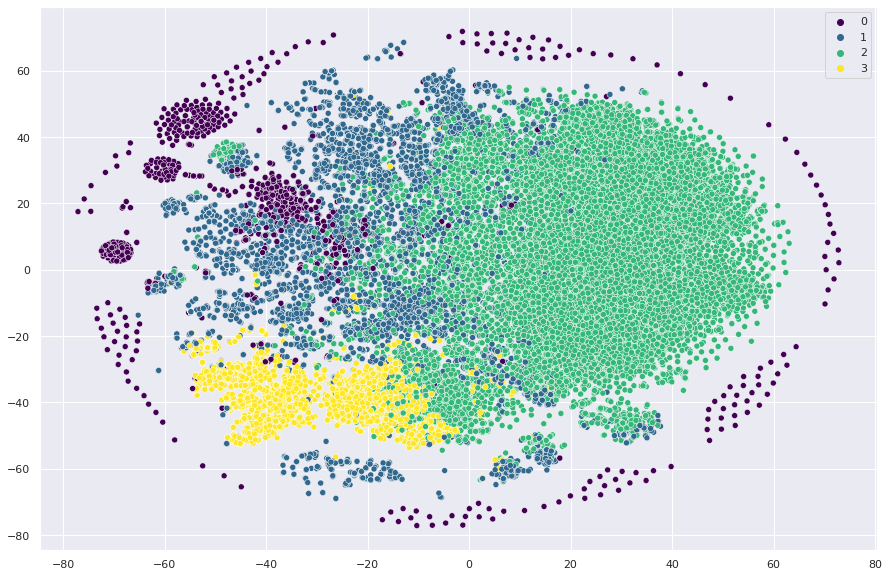

In [27]:
%%time

sns.set(rc={"figure.figsize":(15, 10)}) #width=3, #height=4
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

# Label the sentences

In [28]:
# sentences[0]

In [29]:
# kmeans.labels_[0]

In [30]:
# sentences

In [31]:
# kmeans.labels_

In [32]:
labelled_df = pd.DataFrame()
labelled_df[ 'sentences' ] = sentences
labelled_df[ 'kmeans_label' ] = kmeans.labels_
labelled_df

,sentences,kmeans_label
0,"não é um livro que fala só sobre dinheiro, ele...",2
1,Achei que ficou um pouco repetitivo em alguns ...,2
2,"A tradução, que parece dublagem de filme, meio...",2
3,!!,0
4,Perfeito.,1
...,...,...
29995,sz,0
29996,Amei!!!!,1
29997,"As folhas dos livros também são muito claras, ...",2
29998,Serviço Amazon impecável.,3


## K-Means Labels Distribution

In [33]:
kmeans_label_value_counts = labelled_df[ 'kmeans_label' ].value_counts()

In [34]:
for i in range(0, clusters_total):
    total = kmeans_label_value_counts[i]
    total_percentage = total / total_sentences_load * 100
    print( f'{i}: {total} ({total_percentage:.3}%)' )

0: 1730 (5.77%)
1: 8754 (29.2%)
2: 16641 (55.5%)
3: 2875 (9.58%)


In [35]:
def show_examples( label, sample = 20 ):

    df_temp = labelled_df[ labelled_df[ 'kmeans_label' ] == label]
    df_temp = df_temp.sample( n = sample )

    print( f'Examples from label: {label}' )
    print( '-------------------------------' )

    for index, item in enumerate( df_temp['sentences'] ):
        print( f'>>> {item}' )

    print()
    print( '======================================================================' )
    print()

## Show examples of sentences in each cluster

In [36]:
labels = [ i for i in range(0, clusters_total) ]
labels

[0, 1, 2, 3]

In [37]:
for label in labels:

    show_examples( 
        label = label,
        sample = 10)

Examples from label: 0
-------------------------------
>>> Pelo contrário.
>>> Obs.:
>>> !
>>> haha
>>> tb
>>>  
>>> !
>>> ❤
>>> ?
>>> Nossa!


Examples from label: 1
-------------------------------
>>> O livro é excepcional.
>>> Livro com conteúdo formidável, e bem escrito.
>>> Livro igual a descrição do site gostei muito.
>>> Tadinho!!!
>>> Recomendo a todas as pessoas.
>>> Grande autor do nosso tempo.
>>> Recomendo...
>>> Boa ediçao e bom livro
>>> Essencial para um bom desenvolvedor
>>> Ótimo livro.


Examples from label: 2
-------------------------------
>>> Pelo contrário, ele é cheio de histórias que te prendem.
>>> As crenças de religiões de matriz africana são belamente retratadas dando um toque quase que mágico à obra.
>>> Esse foi um livro que eu achei fraco no início, mas no decorrer da leitura comecei a me sentir inspirado a fazer uma análise dos meus hábitos.
>>> A autora tem uma escrita muito realista que nós faz até acreditar que tudo que esta é 100% real.
>>> Leia, sim

# Save the annotated dataset

In [38]:
df_csv = df[:total_sentences_load]
df_csv[ 'kmeans_label' ] = kmeans.labels_
df_csv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,book_id,review_id,review_rating,sentence,kmeans_label
82107,8575422391,RYGXRRM2L8911,5,"não é um livro que fala só sobre dinheiro, ele...",2
151122,6555650842,R6KW4ILFRTHT8,4,Achei que ficou um pouco repetitivo em alguns ...,2
8838,8550802751,R2MMPX89UEJ732,5,"A tradução, que parece dublagem de filme, meio...",2
171545,8565765695,RA13I9BIX0PUZ,5,!!,0
100159,8578601777,R381JWXQL9UPO3,5,Perfeito.,1
...,...,...,...,...,...
137138,8565765482,R9T3C4QYTSWIH,5,sz,0
95518,8578601777,R1E0POXDSCHEV7,5,Amei!!!!,1
77553,6555650001,R16H4DJV726CMC,2,"As folhas dos livros também são muito claras, ...",2
154712,8545202210,R9S0O1X55KL03,2,Serviço Amazon impecável.,3


In [39]:
df_csv.to_csv(
    f'./datasets/sentences_embeddings_kmeans_label__{total_sentences_load}.csv', 
    encoding = 'utf-8', 
    index = False,
    sep=';'
)

Cosine Similarity

In [40]:
# cosine_similarity(
#     [sentences_embeddings[0]],
#     sentences_embeddings[1:]
# )

In [41]:
# cosine_results = cosine_similarity(
#     sentences_embeddings,
#     sentences_embeddings
# )

In [42]:
# cosine_results